In [44]:
import matplotlib.pyplot as plt

def draw_rectangle(start_x, start_y, end_x, end_y, line_color='black', fill_color=None, line_width=1.0):
    rect = plt.Rectangle((start_x, start_y), end_x - start_x, end_y - start_y, edgecolor=line_color, fill=fill_color is not None, linewidth=line_width, facecolor=fill_color)
    plt.gca().add_patch(rect)

def draw_line(start_x, start_y, end_x, end_y, line_color='black', line_width=1.0):
    plt.plot([start_x, end_x], [start_y, end_y], color=line_color, linewidth=line_width)

def draw_circle(center_x, center_y, radius, line_color='black', fill_color=None, line_width=1.0):
    circle = plt.Circle((center_x, center_y), radius, edgecolor=line_color, fill=fill_color is not None, linewidth=line_width, facecolor=fill_color)
    plt.gca().add_patch(circle)

In [75]:
import numpy as np

def draw_marker(x, min_y, max_y, circle_raidus, color):
    draw_line(x, min_y, x, max_y, line_color='black', line_width=0.5)
    draw_circle(x, max_y, circle_raidus, line_color='black', fill_color=color, line_width=0.5)

def draw_fig(limits, protein_limits, markers):
    gray_x_min, gray_x_max = 0.15, 0.85
    gray_y_min, gray_y_max = 0.492, 0.508
    plt.figure(figsize=(20,20))
    a = 0.2
    b = 0.8

    max_x = max(np.max(limits), np.max(protein_limits), np.max(markers))
    print(max_x)
    
    # normalize into [0, 1]
    preprocess = lambda x: (x / max_x) * (b - a) + a
    limits = np.array(list(map(preprocess, limits)))
    protein_limits = np.array(list(map(preprocess, protein_limits)))
    markers = np.array(list(map(preprocess, markers)))
    
    print(limits)
    
    # draw the gray bar
    draw_rectangle(gray_x_min, gray_y_min, gray_x_max, gray_y_max, line_color='gray', fill_color='gray', line_width=2.0)
    
    exon_min_y, exon_max_y = 0.48, 0.52
    # draw the exons
    for exon_x_min, exon_x_max in limits:
        draw_rectangle(exon_x_min, exon_min_y, exon_x_max, exon_max_y, line_color='black', fill_color='black', line_width=2.0)
    # 
    # # draw markers
    # for marker in markers:
    #     draw_marker(marker, exon_min_y, exon_max_y, 0.01, 'red')
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.gca().set_aspect('equal')
    plt.axis('off')
    plt.show()

limits = [
    (65, 398),
    (530, 555),
    (560, 650),
    (653, 730),
    (739, 815),
    (1090, 1345)
]

limits = np.array(limits)
protein_limits = np.sort(np.concatenate((np.array([0]),np.random.randint(0, 1390, 19),np.array([1390]))))
markers = np.random.randint(0, 1390, 300)

print(limits)
print(protein_limits)
print(markers)

[[  65  398]
 [ 530  555]
 [ 560  650]
 [ 653  730]
 [ 739  815]
 [1090 1345]]
[   0   43   52  224  268  273  291  383  389  408  506  569  862  927
  987 1013 1066 1076 1293 1388 1390]
[ 439 1036 1186  193  280  447  304 1265 1119  277  307 1349 1206  696
  951 1206  643  645  475 1042  458  216  618 1101 1379   14  198  267
  899   74  971  199  825  163 1100    5 1073  201 1223   91 1330 1100
  251  360  962  255  462  687 1076  775 1041  572  657  310  131  809
 1047  717  836 1265  327  220  527  937 1063 1339  987   58  709  923
  352 1272  101  981 1199  154  539  211 1085  880  925 1335 1100  808
 1153  534  565 1084  873   65  649 1191  164  131  805  202  553  581
 1151  908 1337  247 1266  734  243 1336 1015  979  871  834 1313 1026
 1366  566  980  260  747  788   90   31 1154  690  972  111  737  535
  972 1028  933  471 1186 1371 1145  225 1286 1080  255  266  557  925
  272  626 1210  242 1029 1386  461 1206  832   24  680  498 1352  258
   23  480  603  232  256  931  

1390
[[0.22805755 0.37179856]
 [0.42877698 0.43956835]
 [0.44172662 0.48057554]
 [0.4818705  0.51510791]
 [0.51899281 0.55179856]
 [0.6705036  0.78057554]]


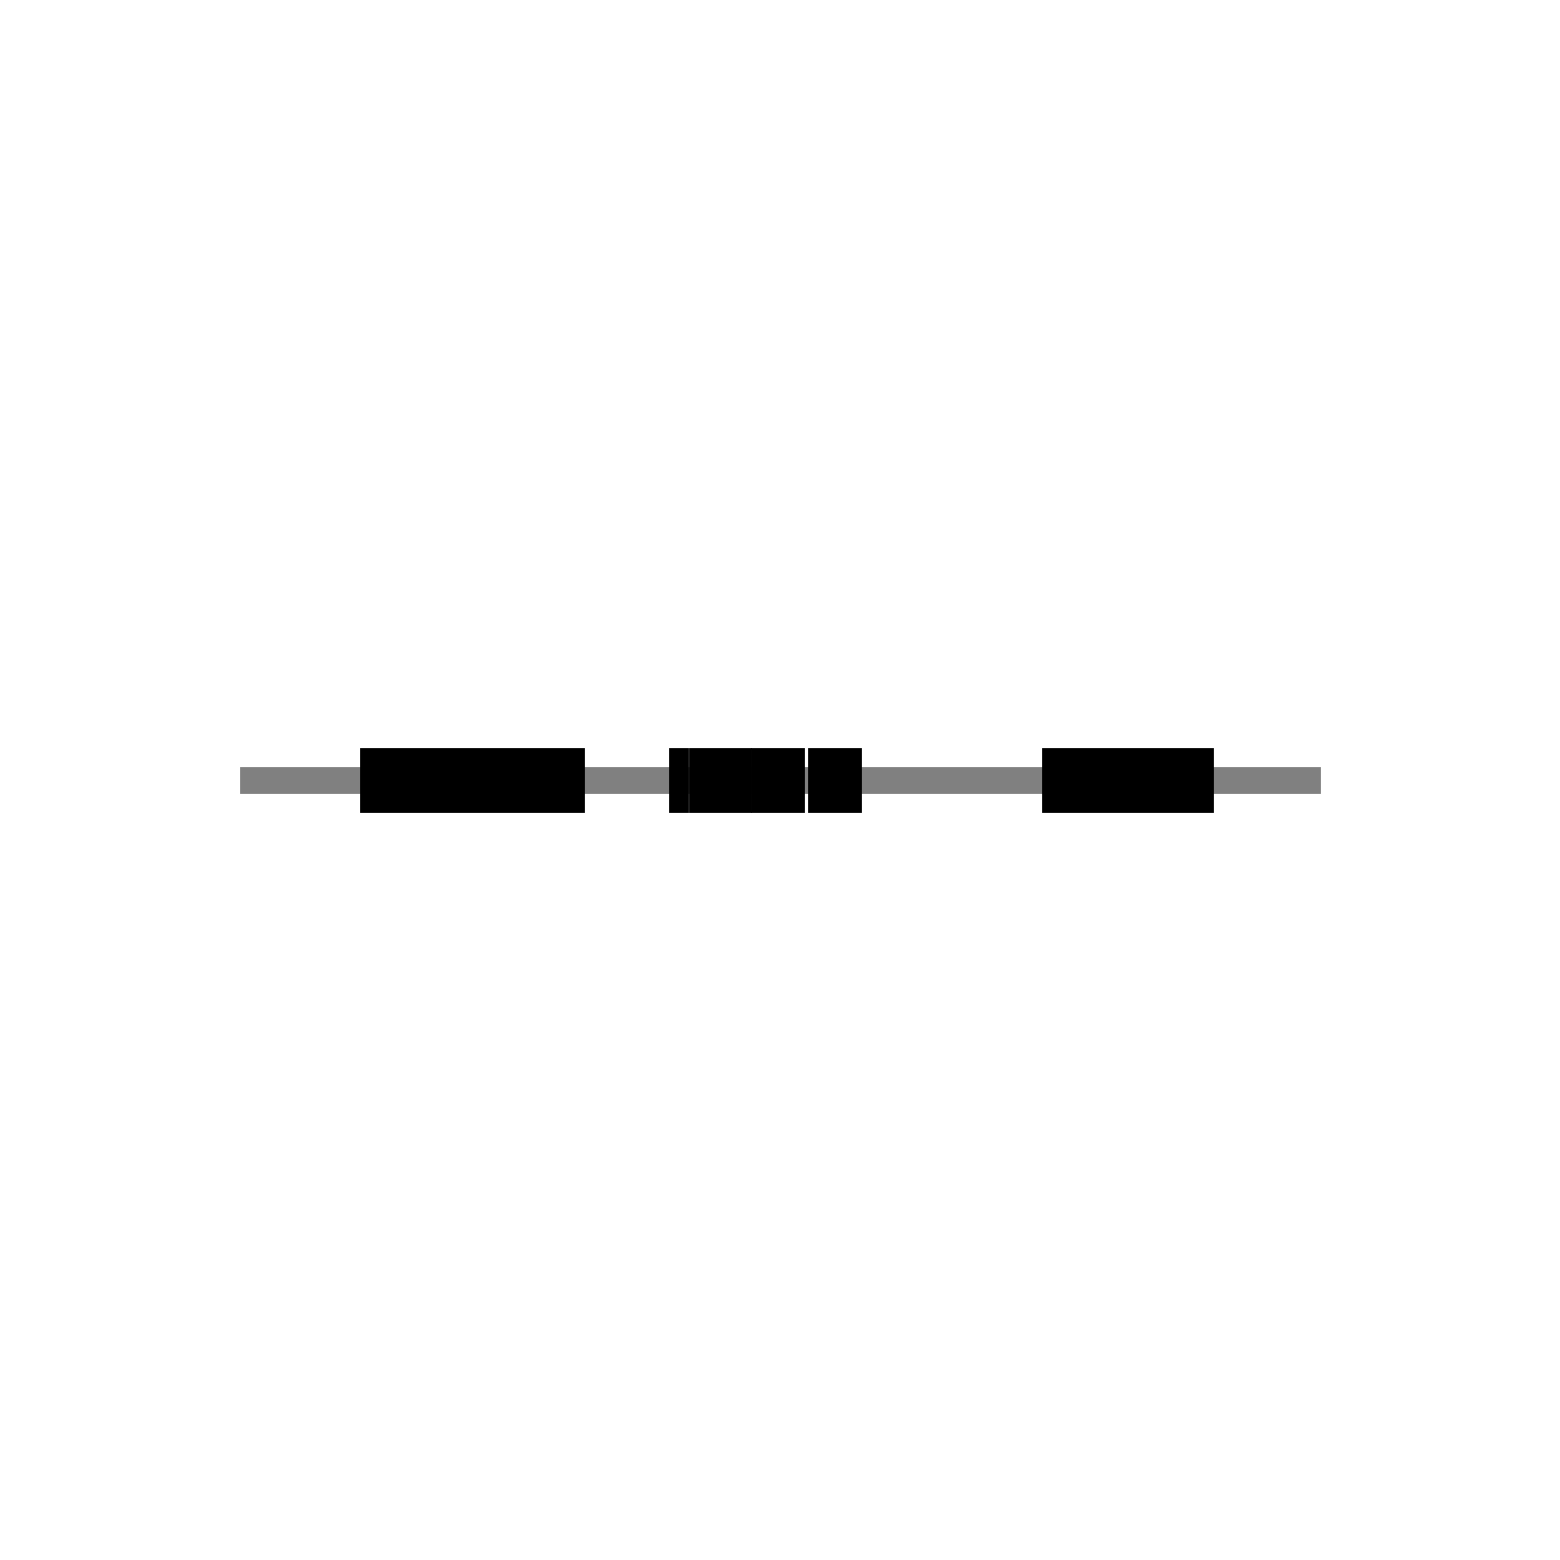

In [76]:
draw_fig(limits, protein_limits, markers)